# Dealing with massively imbalanced datasets for improved fraud detection

Use of synthetic data generation to balance highly imbalanced classes, in particular, generation of synthetic fraudulent events.

The use of synthetic data for this type of use cases helps to improve the accuracy of fraud detection models in many different areas from the banking industry.


### Machine Learning and imbalanced datasets
Highly imbalanced datasets are extremely challenging for data teams, and they can be found very often in the industry, wether in topics such as detecting fraudulent events, but also for money laundry and even credit underwriting.

The commonnality between each one of these use cases? The fact that only a small portion of the overall transactions represent one particular class, for fraud problems, only a portion of those transactions were, in reality, a fraudulent event.

## Credit Fraud - a highy imbalanced dataset
The dataset in this example use case is from Kaggle - ["Credit Card Fraud detection"](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset, as for demonstration purposes we are only able to use datasets from the public domain.
This dataset includes labeled transactions from European credit car holders, and the data provided is a result from a dimensionality reduction, containing 27 continous features and a time column - the number of secons elapsed between the first and the last transaction of the dataset.

### The dataset Exploratory data analysis
(Include here some input on how highly imbalanced are the datasets)

(Include here some metrics and some validations that where done using YData's lib for data analysis)

#### Installing external packages

In [1]:
!pip install xgboost

#### Import needed packages

In [2]:
#Download the data from kaggle and read it using pandas
from datetime import datetime
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Reading the dataset

While using YData's Fabric it is possible to consume the data assets through different means. Fabric included a bi-directional communication between the UI and Labs which allows higher flexibility and data flows reproducibility. 
For a quickstart, and because Labs are a familiar data science space that includes the most beloved data science packages, it is also possible to consume the data while leveraging [pandas](https://pypi.org/project/pandas/).

### Reading a Datasource from the UI

In [3]:
#Copy paste "Use in Labs" code snippet
from ydata.labs import DataSources

datasource = DataSources.get(uid='c953cbfc-3bf0-4ca6-9872-80bdda992115', namespace='44617fb3-5ada-4c33-b0f3-a7c1a3f1a3f5')
credit = datasource.read()

### Reading from a CSV file available in the lab

In [15]:
from ydata.dataset import Dataset

df = pd.read_csv('creditcard.csv')

#Convert from pandas.DataFrame to Dataset, so you're able to use the Data with Synthesizers
credit = Dataset(df)
credit.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


This dataset is highly imbalanced. Let's check the dataset profiling. We know that the "Class" variable is highly imbalanced.

### Profiling the dataset

In [4]:
from ydata.profiling import ProfileReport

#ProfileReport expects a pandas Dataframe as an input. For that reason we need to convert it from the distributed system to Pandas.
credit_df = credit.to_pandas()
#report = ProfileReport(credit_df)

#display the report as html inside the labs
#report

INFO: 2023-03-09 20:25:10,553 Pandas backend loaded 1.5.3
INFO: 2023-03-09 20:25:10,560 Numpy backend loaded 1.23.5
INFO: 2023-03-09 20:25:10,562 Pyspark backend NOT loaded
INFO: 2023-03-09 20:25:10,563 Python backend loaded


Text(0.5, 1.0, 'Scatter plot for V2 and V4 eigenvectors')

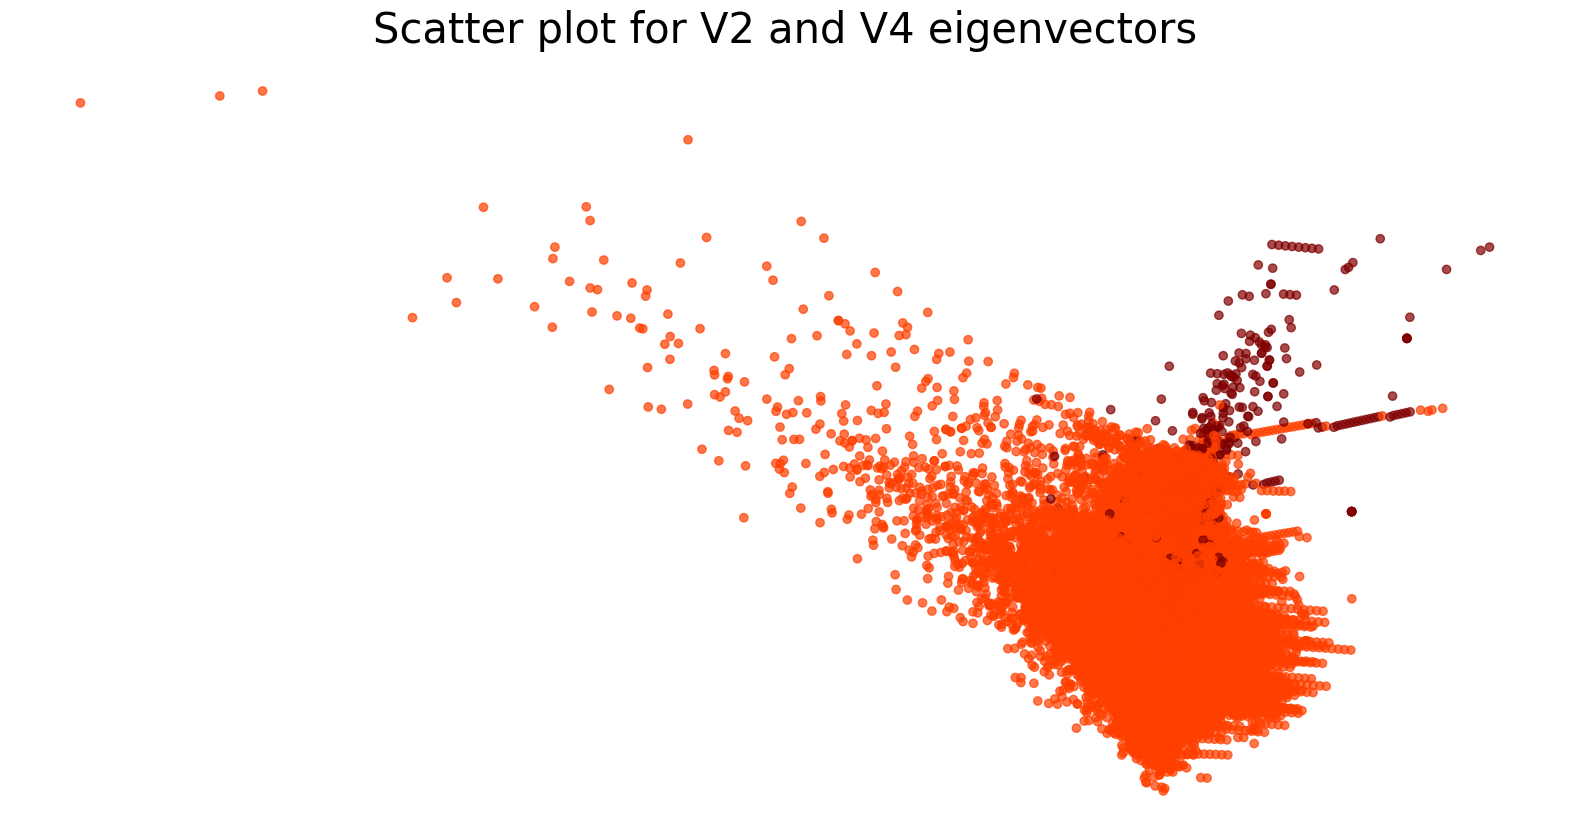

In [5]:
#Scatter plot with Class colouring the different elements from the plot
#As this dataset is the result of a PCA we will be using 2 eigen vectors for the plot
%matplotlib inline
#This is an optinal analysis
import matplotlib as m
import numpy as np

cmap = m.cm.jet(np.linspace(0,1,26))
cmap = m.colors.ListedColormap(cmap[21:,:-1])

fig, ax = plt.subplots(figsize=(20,10))

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.scatter(credit_df['V2'],credit_df['V4'], alpha=0.7, c=credit_df['Class'],cmap=cmap)
plt.axis('off')
plt.title('Scatter plot for V2 and V4 eigenvectors', fontsize=30, pad=10)

## Create an holdout set

*This is an optional step.* In case you have your holdout already set, go ahead and skip uit, otherwise, we highly recommend it before applying any data preparation stratgey that involves your target variable.

Splitting the dataset in train and holdout sets. The holdout set will be used again at the end of our iteration

In [6]:
#get your dataset metadata
from ydata.metadata import Metadata

metadata = Metadata(credit)

#update any column with the right datatype
#Update Class in this case
metadata.update_datatypes({'Class':'categorical'})

print(metadata)

Metadata Summary 
 
Dataset type: TABULAR
Dataset attributes: 
Number of columns: 31
Duplicate rows: 55
Target column: 

Column detail: 
    Column    Data type Variable type
0     Time    numerical         float
1       V1    numerical         float
2       V2    numerical         float
3       V3    numerical         float
4       V4    numerical         float
5       V5    numerical         float
6       V6    numerical         float
7       V7    numerical         float
8       V8    numerical         float
9       V9    numerical         float
10     V10    numerical         float
11     V11    numerical         float
12     V12    numerical         float
13     V13    numerical         float
14     V14    numerical         float
15     V15    numerical         float
16     V16    numerical         float
17     V17    numerical         float
18     V18    numerical         float
19     V19    numerical         float
20     V20    numerical         float
21     V21    numerical    

In [83]:
from ydata.dataset.holdout import Holdout

hold = Holdout()
#you can set the holdout size by setting the fraction parameter
hold._fraction = 0.30

#get the train and holdout sets. In this case, and given we have a highly imbalanced set of data, it is recommended using the stratefied holdout version
train, holdout = hold.get_split(credit, 
                                metadata=metadata,
                                strategy='stratified')

In [84]:
n_train = len(train)
n_holdout = len(holdout)

print("Number transactions train dataset: ", n_train)
print("Number transactions test dataset: ",n_holdout)

Number transactions train dataset:  155774
Number transactions test dataset:  74230


In [85]:
# as we are going to use sklearn and xgboost for the model development, it is best to conver from distributed to pandas.DataFrame, for integration purposes
# As this is a small dataset, it is feasible to do it
df_train = train.to_pandas()
df_holdout = holdout.to_pandas().dropna()

n_frauds_train = len(df_train[df_train['Class']==1])
n_frauds_holdout = len(df_holdout[df_holdout['Class']==1])

print("Ratio of the fraud events for the \033[1mtrain\033[0m  dataset:"+ " {:.2}%".format(n_frauds_train/n_train))
print("Ratio of the fraud events for the \033[1mholdout\033[0m dataset:"+ " {:.2}%".format(n_frauds_holdout/n_holdout))

Ratio of the fraud events for the train  dataset: 0.0017%
Ratio of the fraud events for the holdout dataset: 0.0017%


### The first model
Let's try to develop a model basedo n the assumption that everything is ok with our dataset, and understand how good is our classifier to indetify fraudulent events.
Here we've decided to develop a classifier using [RandomForest from the scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) package.

In [86]:
y_train = df_train['Class']
y_holdout = df_holdout['Class']

#Removing the target column
X_train = df_train.drop('Class', axis=1)
X_holdout = df_holdout.drop('Class', axis=1)

In [87]:
#Data scaling and preprocessing before training the model
from sklearn.preprocessing import RobustScaler, StandardScaler

def preprocess_df(df, std_scaler, rob_scaler):
    df['Amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
    df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
    return df

In [88]:
stdscaler = StandardScaler()
robscaler = RobustScaler()

X_train = preprocess_df(X_train, stdscaler, robscaler)

In [89]:
#Apply the same trasnformation to the test dataset
X_test = preprocess_df(X_holdout, stdscaler, robscaler)

In [90]:
#Using XGBOOST model to train the model
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


def XGBoost_Classifier(X, y, Xtest):
    """XGBoost training code"""
    classifier = XGBClassifier()
    print('Start fitting XGBoost classifier')
    classifier.fit(X, y)
    y_pred = classifier.predict(Xtest)
    print('Classifier trained.')
    return classifier, y_pred

classifier_model, y_pred = XGBoost_Classifier(X_train, y_train, X_holdout)

Start fitting XGBoost classifier
Classifier trained.


In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Print precision / recall report
print('Overall accuracy score :',accuracy_score(y_holdout, y_pred))
print('Classifier performance report: ')
print(classification_report(y_holdout, y_pred, target_names=['Normal', 'Fraud']))

Overall accuracy score : 0.9997844450132701
Classifier performance report: 
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     74103
       Fraud       0.97      0.90      0.93       124

    accuracy                           1.00     74227
   macro avg       0.98      0.95      0.97     74227
weighted avg       1.00      1.00      1.00     74227



## Synthetic data to improve the detection of fraud

### Synthetic data with YData synthesizer package

In this case the objective is to synthesize only the fraudulent events. Through the augmentation of fraudulent events we are able to improve the results the results of our classifier.

In [93]:
#Let's filter by fraudulent events only
non_fraud = df_train[df_train['Class'] == 0]
fraud = df_train[df_train['Class']==1]

In [94]:
#Have here YData's lib to be called and used in the Jupyter Notebook
from ydata.synthesizers.regular import RegularSynthesizer
from ydata.dataset import Dataset

fraud = Dataset(fraud)
fraud_metadata = Metadata(fraud)

#update any data types that are needed
fraud_metadata.update_datatypes({'Class':'categorical'})

fraud_synth = RegularSynthesizer()
fraud_synth.fit(fraud, metadata=fraud_metadata)

INFO: 2023-03-09 20:51:41,612 [SYNTHESIZER] - Number columns considered for synth: 31
INFO: 2023-03-09 20:51:43,130 [SYNTHESIZER] - Starting the synthetic data modeling process over 1x1 blocks.
INFO: 2023-03-09 20:51:43,135 [SYNTHESIZER] - Preprocess segment
INFO: 2023-03-09 20:51:43,142 [SYNTHESIZER] - Synthesizer init.
INFO: 2023-03-09 20:51:43,143 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.


In [95]:
synthetic_fraud = fraud_synth.sample(n_samples=400)

synthetic_fraud.head(10)

INFO: 2023-03-09 20:51:44,165 [SYNTHESIZER] - Start generating model samples.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,81372.0,-0.356326,1.790649,-0.813564,4.127549,-1.543510,0.188582,-3.459979,1.344059,-1.181743,...,0.618248,0.299614,-0.034882,0.257209,-2.079928,-0.163009,0.489035,0.112146,1.00,1
1,41203.0,-10.940739,3.854150,-14.182339,8.807369,-9.951363,-2.681519,-14.248847,7.096472,-5.654212,...,2.549628,0.692667,-0.096130,0.432377,-0.712593,0.394355,3.052358,0.035124,0.01,1
2,53937.0,-6.003422,-3.930731,-3.513408,1.714669,2.272194,-2.329583,0.849686,-2.746111,0.887673,...,-0.312863,0.184087,0.258148,-0.448950,-0.205151,-0.539073,0.073796,-0.237807,2.00,1
3,42474.0,-3.843009,3.375110,-4.468260,4.455230,-2.493138,-1.800904,-4.172315,1.703538,-2.457034,...,1.775030,0.614573,-0.266476,-0.477983,-0.863166,-0.390901,0.891025,0.608075,99.99,1
4,102619.0,-2.488363,3.738235,-2.317843,2.512986,0.394001,-1.581954,-3.696178,1.299096,-1.675884,...,0.540731,-0.321691,-0.180255,-0.226416,-0.390658,-0.087832,0.264028,-0.131525,0.00,1
5,8451.0,1.234235,3.019740,-4.137422,4.732795,3.624201,-1.357746,1.987616,-2.957235,-0.694696,...,-1.394504,-1.047398,-1.452081,-1.632653,1.488901,0.555265,-0.130918,0.187657,1.00,1
6,160243.0,-2.783865,3.977881,-3.098030,2.588033,0.406328,-2.329583,-3.106942,-2.226592,-1.675884,...,-0.664694,0.511285,0.947506,-0.567608,-0.205609,0.601658,-1.742558,0.398348,323.77,1
7,41243.0,-8.426814,6.866198,-11.838269,8.698610,-7.862419,-2.854415,-8.138589,5.339500,-7.051016,...,2.679490,-0.047335,0.216414,0.625349,-0.821036,0.444577,-1.508968,0.198294,1.00,1
8,152710.0,0.051075,1.176270,-2.213700,2.650530,1.402358,-0.400859,0.232463,0.085449,-1.724333,...,-0.312000,0.766927,-0.189624,-0.340688,0.299285,-0.077278,0.011970,0.108276,7.59,1
9,12093.0,-1.426623,0.020218,-0.168438,1.384394,-1.913977,-0.214415,0.059110,-1.634233,-0.238253,...,0.203563,0.835795,0.019266,-0.567608,0.252405,-0.542628,-0.021363,0.039581,549.06,1


## Visualizing the generated synthetic data

In [96]:
#convert from distributed system to pandas
synthetic_fraud=synthetic_fraud.to_pandas()

*The next step is optional.* 

Let's visualize the newly generated synthetic fraud in a two dimensional space, while leveraging the dataset eigen vectors. 

Selected colours by type of record:
1. Non-fraud
2. Fraud real
3. Fraud synthetic

In [97]:
synth_df = synthetic_fraud.copy()
org_df = X_train.copy()

org_df['Class'] = y_train.reset_index()['Class']
org_df['color'] = np.where(org_df['Class']==1, 2, 1)

synth_df['color'] = 3

full_data = pd.concat([org_df, synth_df])

In [98]:
full_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,color
0,-0.995015,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.242852,0,1
1,-0.995015,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.345501,0,1
2,-0.995004,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160000,0,1
3,-0.995004,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.138260,0,1
4,-0.994992,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.076011,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,148479.000000,-1.611877,3.846800,-8.392423,6.666273,-1.254924,-2.084875,-2.650137,1.471140,-4.322377,...,1.605085,0.665411,0.284122,-0.335869,0.246466,0.577052,0.287592,1.000000,1,3
396,72327.000000,0.315642,1.636778,-1.367020,5.390793,3.336060,-0.807712,-1.515521,-0.110353,-3.267693,...,-0.425938,-0.092088,-0.279642,0.454594,0.280717,0.132218,0.176736,4.870000,1,3
397,41607.000000,-15.020981,8.075240,-16.867238,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-4.099551,...,0.521162,-0.235096,0.508529,0.314389,-0.453840,-2.400811,0.409424,144.800000,1,3
398,135314.000000,-0.079653,3.222010,-3.724201,6.037345,0.583395,-3.407679,-2.916576,0.561257,-3.541780,...,-0.538375,0.530481,0.421146,-0.642848,-0.103716,1.108897,0.595610,3.790000,1,3


Using a PCA we are able to  reduce the dimensionality of the dataset and and better visualize the relation between both the synthetic fraud generated events and the ones from the original data, regardless they're fraud or normal events. 

The randomness introduced by the synthetic data can help the model to generalize for a new dataset and new fraud events never previously observed.

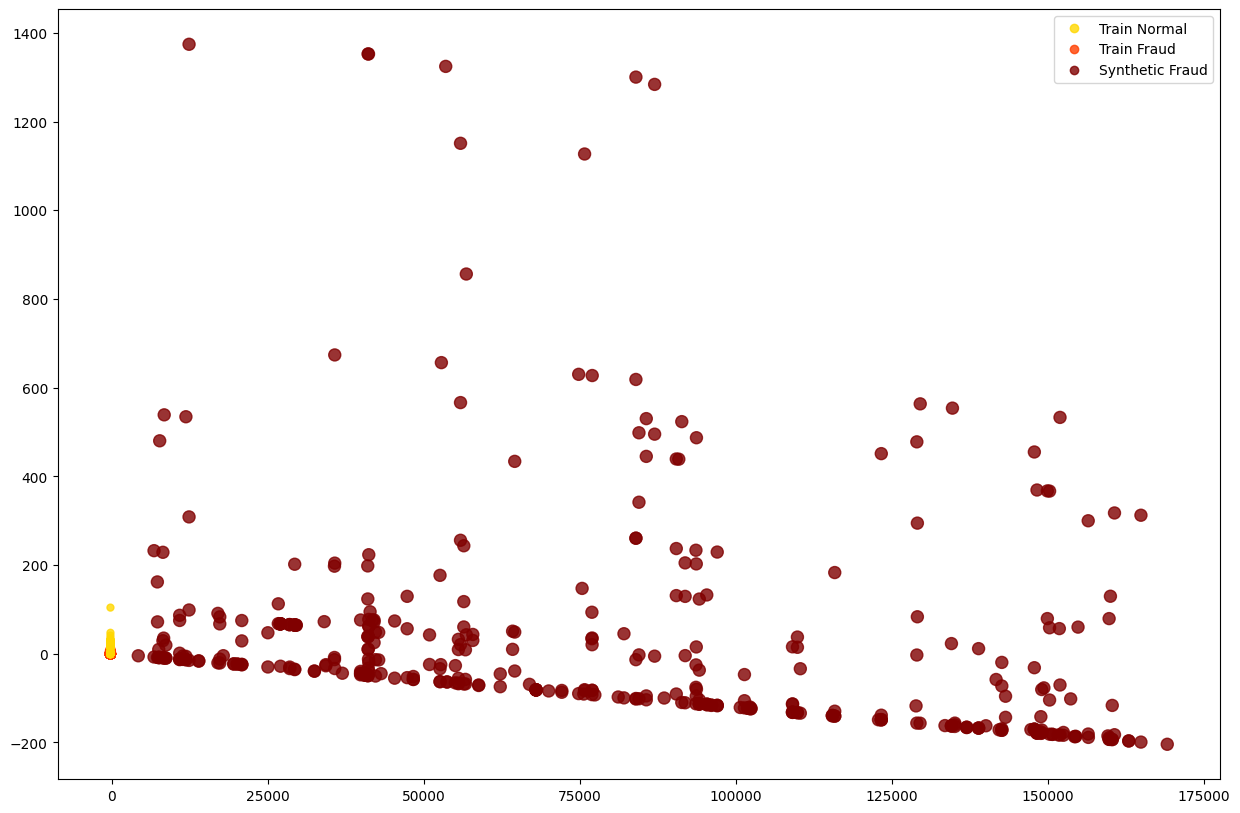

In [99]:
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = full_data.iloc[:, :-2]
color = full_data['color']

fig = plt.figure(1, figsize=(15, 10))
plt.clf()
plt.cla()

cmap = m.cm.jet(np.linspace(0,1,26))
cmap = m.colors.ListedColormap(cmap[17:,:-1])

pca = PCA(n_components=2)
projected = pca.fit_transform(X)

labels = ['Train Normal', 'Train Fraud', 'Synthetic Fraud']

size_map = {1:25, 2:50, 3:75}
sizes = [size_map[x] for x in color]

scatter = plt.scatter(projected[:, 0], projected[:, 1],
                      s=sizes,
                      c=color,
                      cmap=cmap, 
                      alpha=0.8)

plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.show()

### Testing the classifier capacity after adding more fraudulent events

In [100]:
#Create a new training dataset

synth_y_train = synthetic_fraud['Class']
synth_train = synthetic_fraud.drop('Class', axis=1)

X_augmented = pd.concat([X_train, synth_train], axis=0)
y_augmented = pd.concat([y_train, synth_y_train], axis=0)

In [101]:
synth_classmodel, y_pred = XGBoost_Classifier(X_augmented, y_augmented, X_holdout)

Start fitting XGBoost classifier
Classifier trained.


In [102]:
# Print precision / recall report
print('Overall accuracy score :',accuracy_score(y_holdout, y_pred))
print('Classifier performance report: ')
print(classification_report(y_holdout, y_pred, target_names=['Normal', 'Fraud']))

Overall accuracy score : 0.9997979171999407
Classifier performance report: 
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     74103
       Fraud       0.97      0.91      0.94       124

    accuracy                           1.00     74227
   macro avg       0.98      0.96      0.97     74227
weighted avg       1.00      1.00      1.00     74227

